In [ ]:
import numpy as np
import pandas as pd
np.__version__, pd.__version__

('1.21.6', '1.3.5')

In [ ]:
df_economy = pd.read_csv('economy.csv', encoding = 'Latin-1', low_memory=False)
df_picks = pd.read_csv('picks.csv', encoding = 'Latin-1', low_memory=False)
df_players = pd.read_csv('players.csv', encoding = 'Latin-1', low_memory=False)
df_results = pd.read_csv('results.csv', encoding = 'Latin-1', low_memory=False)
# Importing the data from Kaggle.

In [ ]:
df_economy.fillna(0, inplace=True)
df_picks.fillna(0, inplace=True)
df_players.fillna(0, inplace=True)
df_results.fillna(0, inplace=True)
# Cleaning the data.

In [ ]:
df_new = pd.DataFrame()
for i in [1, 2, 3]:
  player_col = ['match_id', 'player_id', 'team', f'map_{i}', f'm{i}_kills', f'm{i}_assists', f'm{i}_deaths', f'm{i}_hs', f'm{i}_flash_assists', f'm{i}_kast', f'm{i}_kddiff', f'm{i}_adr',
                f'm{i}_fkdiff', f'm{i}_rating']
  df_temp = df_players[player_col]
  df_temp.columns = ['match_id', 'player_id', 'team', '_map', 'kills', 'assists', 'deaths', 'hs', 'flash_assists', 'kast', 'kddiff', 'adr', 'fkdiff', 'rating']
  df_temp = df_temp.dropna()
  df_new = df_new.append(df_temp)

In [ ]:
df_new.head()

,match_id,player_id,team,_map,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating
0,2339385,9136,Evil Geniuses,Overpass,11.0,3.0,18.0,5.0,0.0,65.2,-7.0,60.8,-1.0,0.70
1,2339385,11219,Evil Geniuses,Overpass,11.0,2.0,17.0,4.0,2.0,60.9,-6.0,68.9,-1.0,0.75
2,2339385,8738,Liquid,Overpass,15.0,3.0,12.0,9.0,0.0,69.6,3.0,77.0,3.0,1.32
3,2339385,10671,Evil Geniuses,Overpass,11.0,1.0,15.0,6.0,1.0,65.2,-4.0,60.7,-2.0,0.73
4,2339385,8520,Liquid,Overpass,10.0,5.0,12.0,3.0,3.0,65.2,-2.0,51.5,0.0,0.83


In [ ]:
df_new.describe()

,match_id,player_id,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating
count,8.271000e+03,8271.000000,8271.000000,8271.000000,8271.00000,8271.000000,8271.000000,8271.000000,8271.000000,8271.000000,8271.000000,8271.000000
mean,2.339608e+06,12407.556402,10.537178,2.699553,10.55084,4.832064,0.729053,41.556583,-0.014146,43.840116,-0.001693,0.629311
std,1.513787e+02,4664.147951,9.852088,2.985705,9.36268,4.943621,1.285385,35.265695,5.341306,38.634542,1.914875,0.573318
min,2.339069e+06,147.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-21.000000,0.000000,-9.000000,0.000000
25%,2.339555e+06,9130.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000
50%,2.339634e+06,12572.000000,12.000000,2.000000,13.00000,4.000000,0.000000,58.600000,0.000000,56.200000,0.000000,0.750000
75%,2.339718e+06,16309.000000,19.000000,5.000000,18.00000,8.000000,1.000000,72.400000,1.000000,76.000000,0.000000,1.100000
max,2.339828e+06,20011.000000,58.000000,16.000000,40.00000,26.000000,10.000000,100.000000,29.000000,160.200000,13.000000,2.630000


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8271 entries, 0 to 2756
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       8271 non-null   int64  
 1   player_id      8271 non-null   int64  
 2   team           8271 non-null   object 
 3   _map           8271 non-null   object 
 4   kills          8271 non-null   float64
 5   assists        8271 non-null   float64
 6   deaths         8271 non-null   float64
 7   hs             8271 non-null   float64
 8   flash_assists  8271 non-null   float64
 9   kast           8271 non-null   float64
 10  kddiff         8271 non-null   float64
 11  adr            8271 non-null   float64
 12  fkdiff         8271 non-null   float64
 13  rating         8271 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 969.3+ KB


In [ ]:
# Add the rounds won/lost data from df_results to our dataframe
df_teams = [None, None]
for i in range (2):
  df_teams[i] = df_results[['match_id', '_map', f'team_{i+1}', f'result_{i+1}', f'result_{(not i) + 1}']]
  df_teams[i].rename(columns={f'team_{i+1}': 'team', f'result_{i+1}': 'rounds_won', f'result_{(not i)+1}': 'rounds_lost'}, inplace=True)

df_teams = pd.concat(df_teams)
df_new = df_new.merge(df_teams, on=['match_id', '_map', 'team'])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_new.head()

,match_id,player_id,team,_map,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,rounds_won,rounds_lost
0,2339385,9136,Evil Geniuses,Overpass,11.0,3.0,18.0,5.0,0.0,65.2,-7.0,60.8,-1.0,0.70,7.0,16.0
1,2339385,11219,Evil Geniuses,Overpass,11.0,2.0,17.0,4.0,2.0,60.9,-6.0,68.9,-1.0,0.75,7.0,16.0
2,2339385,10671,Evil Geniuses,Overpass,11.0,1.0,15.0,6.0,1.0,65.2,-4.0,60.7,-2.0,0.73,7.0,16.0
3,2339385,8507,Evil Geniuses,Overpass,10.0,1.0,17.0,6.0,0.0,43.5,-7.0,64.5,-4.0,0.65,7.0,16.0
4,2339385,8523,Evil Geniuses,Overpass,14.0,7.0,15.0,6.0,3.0,69.6,-1.0,63.4,-1.0,0.95,7.0,16.0


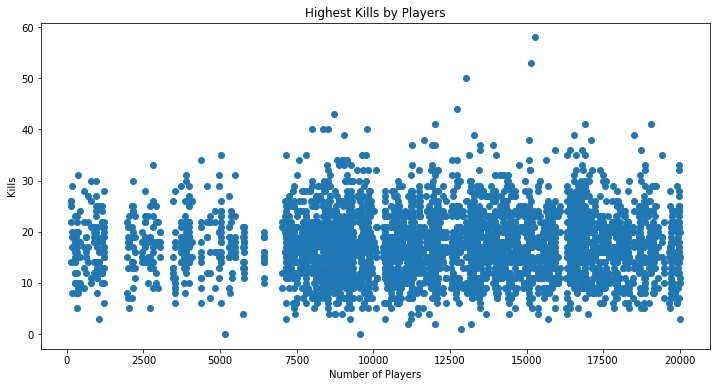

In [ ]:
import matplotlib.pyplot as plt
from pylab import plt, mpl
plt.figure(figsize=(12,6))
x = df_new['player_id']
y = df_new['kills']
plt.scatter(x, y)
plt.title("Highest Kills by Players")
plt.xlabel("Number of Players")
plt.ylabel("Kills")
plt.show()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4066 entries, 0 to 4065
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       4066 non-null   int64  
 1   player_id      4066 non-null   int64  
 2   team           4066 non-null   object 
 3   _map           4066 non-null   object 
 4   kills          4066 non-null   float64
 5   assists        4066 non-null   float64
 6   deaths         4066 non-null   float64
 7   hs             4066 non-null   float64
 8   flash_assists  4066 non-null   float64
 9   kast           4066 non-null   float64
 10  kddiff         4066 non-null   float64
 11  adr            4066 non-null   float64
 12  fkdiff         4066 non-null   float64
 13  rating         4066 non-null   float64
 14  rounds_won     4066 non-null   float64
 15  rounds_lost    4066 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 540.0+ KB


In [ ]:
df_new['kills'] = pd.to_numeric(df_new['kills'], errors='coerce')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4066 entries, 0 to 4065
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       4066 non-null   int64  
 1   player_id      4066 non-null   int64  
 2   team           4066 non-null   object 
 3   _map           4066 non-null   object 
 4   kills          4066 non-null   float64
 5   assists        4066 non-null   float64
 6   deaths         4066 non-null   float64
 7   hs             4066 non-null   float64
 8   flash_assists  4066 non-null   float64
 9   kast           4066 non-null   float64
 10  kddiff         4066 non-null   float64
 11  adr            4066 non-null   float64
 12  fkdiff         4066 non-null   float64
 13  rating         4066 non-null   float64
 14  rounds_won     4066 non-null   float64
 15  rounds_lost    4066 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 540.0+ KB


In [ ]:
df_topkills = df_new['kills'].nlargest(10)
print(df_topkills)

2525    58.0
2524    53.0
723     50.0
725     44.0
728     43.0
1157    41.0
1364    41.0
3306    41.0
720     40.0
1391    40.0
Name: kills, dtype: float64


In [ ]:
df_results.head()

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0.0,16.0,2.0,2.0,0.0,1.0,0.0,15.0,5151.0,2340454.0,62.0,63.0,0.0,2.0,2.0
1,2020-03-18,Recon 5,TeamOne,Inferno,13.0,16.0,2.0,2.0,8.0,6.0,5.0,10.0,5151.0,2340454.0,62.0,63.0,0.0,2.0,2.0
2,2020-03-18,New England Whalers,Station7,Inferno,12.0,16.0,2.0,1.0,9.0,6.0,3.0,10.0,5243.0,2340461.0,140.0,118.0,12.0,16.0,2.0
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7.0,16.0,2.0,2.0,0.0,8.0,7.0,8.0,5151.0,2340453.0,61.0,38.0,0.0,2.0,2.0
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8.0,16.0,2.0,2.0,4.0,5.0,4.0,11.0,5151.0,2340453.0,61.0,38.0,0.0,2.0,2.0


In [ ]:
df_players.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99


In [ ]:
df_picks.head()

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2


In [ ]:
df_economy.head()

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,...,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5.0,Nuke,t,ct,4350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-01,2339402,4901,G2,Natus Vincere,5.0,Dust2,ct,t,3900.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0
2,2020-03-01,2339402,4901,G2,Natus Vincere,5.0,Mirage,t,ct,4150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3.0,Dust2,t,ct,4150.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3.0,Nuke,ct,t,4200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
min_rank = 30
df_results = df_results[(df_results.rank_1<min_rank)&(df_results.rank_2<min_rank)]
df_picks     = df_picks  [df_picks  .match_id.isin(df_results.match_id.unique())]
df_economy   = df_economy[df_economy.match_id.isin(df_results.match_id.unique())]
df_players   = df_players[df_players.match_id.isin(df_results.match_id.unique())]

In [ ]:
# Distribution of Scores

winner_1 = df_results[df_results.result_1>=df_results.result_2].result_1.values
loser_1  = df_results[df_results.result_1>=df_results.result_2].result_2.values

winner_2 = df_results[df_results.result_1<df_results.result_2].result_2.values
loser_2  = df_results[df_results.result_1<df_results.result_2].result_1.values

winner = np.concatenate((winner_1, winner_2))
loser = np.concatenate((loser_1, loser_2))
df_scores = pd.DataFrame(np.vstack((winner,loser)).T,columns=['winner','loser'])

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from os import listdir

In [ ]:
gb = df_scores.groupby(by=['winner','loser'])['winner'].count()/df_scores.shape[0]
overtime_percentage = str(round(gb[gb.index.get_level_values(0)!=16].sum()*100,1))+'%'
gb = round(gb[gb>10**-3]*100,1)
index_plot = np.array(gb.index.get_level_values(0).astype('str'))+'-'+np.array(gb.index.get_level_values(1).astype('str'))
fig = go.Figure()
fig.add_trace(go.Scatter(x=index_plot,y=gb.values, name='results'))
fig.update_layout(xaxis_type='category', title='Scores distribution',xaxis_title='Score',yaxis_title='Percentage of matches (%)')

In [ ]:
gb.head()

winner  loser
15.0    15.0     0.4
16.0    0.0      0.4
        1.0      0.8
        2.0      1.9
        3.0      3.0
Name: winner, dtype: float64

In [ ]:
overtime_percentage

'9.9%'

**Most CT sided Map**

In [ ]:
ct_1 = df_results[['date','_map','ct_1']].rename(columns={'ct_1':'ct'})
ct_2 = df_results[['date','_map','ct_2']].rename(columns={'ct_2':'ct'})
ct = pd.concat((ct_1,ct_2))

In [ ]:
t_1 = df_results[['date','_map','t_1']].rename(columns={'t_1':'t'})
t_2 = df_results[['date','_map','t_2']].rename(columns={'t_2':'t'})
t = pd.concat((t_1,t_2))

In [ ]:
t = t.sort_values('date')
ct = ct.sort_values('date')

In [ ]:
maps = ['Cache','Cobblestone','Dust2','Inferno','Mirage','Nuke','Overpass','Train','Vertigo']

In [ ]:
series_t, series_ct, how_ct = {},{},{}
for i, key in enumerate(maps):
    t_map = t[t._map == maps[i]]
    ct_map = ct[ct._map == maps[i]]
    y_t = t_map.t.rolling(min_periods = 20, window= 200, center=True).sum().values
    y_ct = ct_map.ct.rolling(min_periods = 20, window= 200, center=True).sum().values

    series_t[key] = pd.Series(data=y_t,index=t_map.date)
    series_ct[key] = pd.Series(data=y_ct,index=ct_map.date)

    how_ct[key] = series_ct[key]/(series_ct[key]+series_t[key])//0.001/10

In [ ]:
def add_trace(_map):
    fig.add_trace(go.Scatter(x=how_ct[_map].index, y=how_ct[_map].values, name=_map))

In [ ]:
fig = go.Figure()
for _map in maps:
    add_trace(_map)
fig.add_trace(go.Scatter(x=['01-01-2019', '12-03-2020'], y=[50,50], mode='lines', line=dict(color='grey'), showlegend=False))
fig.update_layout(title='Distribution of rounds between CT and T sides', yaxis_title='Percentage of round won on the CT-side (%)')
fig.show()

** Maps played per period**

In [ ]:
print('Total number of matches played on the map:')
df_results.groupby('_map').date.count()

Total number of matches played on the map:


_map
Cache        36
Dust2       350
In            1
Inferno     332
Mirage      347
Nuke        309
Overpass    258
Train       252
Vertigo      99
Name: date, dtype: int64

In [ ]:
majors = [{'tournament':'01. Cluj-Napoca 2015','start_date': '28-10-2015'},
          {'tournament':'02. Columbus 2016','start_date': '29-03-2016'},
          {'tournament':'03. Cologne 2016','start_date': '05-07-2016'},
          {'tournament':'04. Atlanta 2017','start_date': '22-01-2017'},
          {'tournament':'05. Krakow 2017','start_date': '16-07-2017'},
          {'tournament':'06. Boston 2018','start_date': '26-01-2018'},
          {'tournament':'07. London 2018','start_date': '20-09-2018'},
          {'tournament':'08. Katowice 2019','start_date': '28-02-2019'},
          {'tournament':'09. Berlin 2019','start_date': '05-09-2019'}]

In [ ]:
def create_col_time_period(df):
    df['time_period'] = ''

    for major_start in majors:
        df.loc[(df['date']>=major_start['start_date']),'time_period'] = major_start['tournament']

    return df

In [ ]:
df_results = create_col_time_period(df_results)
df_economy = create_col_time_period(df_economy)
df_picks = create_col_time_period(df_picks)
df_players = df_players.merge(df_results[['match_id','time_period']],'left', on='match_id')

In [ ]:
df_results_team_1 = df_results[['time_period','team_1','_map','ct_1','t_2','ct_2','t_1']].rename(columns={'team_1':'team'})
df_results_team_2 = df_results[['time_period','team_2','_map','ct_1','t_2','ct_2','t_1']].rename(columns={'team_2':'team'})
df_results_teams = pd.concat((df_results_team_1,df_results_team_2))[['time_period','team','_map']]

In [ ]:
gb = df_results_teams.groupby(['time_period','_map']).team.count()
gb_text = round(gb*100/gb.groupby('time_period').sum(), 1).reset_index().rename(columns={'team':'percentage'})
gb_text.percentage = gb_text.percentage.astype(str)+'%'
gb = gb.reset_index()

In [ ]:
gb.head()

,time_period,_map,team
0,,Cache,72
1,,Dust2,700
2,,In,2
3,,Inferno,664
4,,Mirage,694


In [ ]:
gb_text.head()

,time_period,_map,percentage
0,,Cache,1.8%
1,,Dust2,17.6%
2,,In,0.1%
3,,Inferno,16.7%
4,,Mirage,17.5%


In [ ]:
maps

['Cache',
 'Cobblestone',
 'Dust2',
 'Inferno',
 'Mirage',
 'Nuke',
 'Overpass',
 'Train',
 'Vertigo']

In [ ]:
gb

,time_period,_map,team
0,,Cache,72
1,,Dust2,700
2,,In,2
3,,Inferno,664
4,,Mirage,694
5,,Nuke,618
6,,Overpass,516
7,,Train,504
8,,Vertigo,198


In [ ]:
fig = go.Figure()
for _map in maps:
    fig.add_bar(name=_map,x=gb[gb._map==_map].time_period,y=gb[gb._map==_map].team,
                text=gb_text[gb_text._map==_map].percentage,textposition='inside')

fig.update_layout(barmode='stack',legend=dict(traceorder='normal'),yaxis_title='Number of maps played',font=dict(size=10))
fig.show()

**Best Teams on each map**

In [ ]:
df_results_team_1_ct = df_results_team_1.rename(columns={'ct_1':'ct_team','t_2':'t_opponent'}).drop(columns=['ct_2','t_1'])
df_results_team_2_ct = df_results_team_2.rename(columns={'ct_2':'ct_team','t_1':'t_opponent'}).drop(columns=['ct_1','t_2'])
df_results_ct = pd.concat((df_results_team_1_ct,df_results_team_2_ct),sort=True)

df_results_team_1_t = df_results_team_1.rename(columns={'t_1':'t_team','ct_2':'ct_opponent'}).drop(columns=['ct_1','t_2'])
df_results_team_2_t = df_results_team_2.rename(columns={'t_2':'t_team','ct_1':'ct_opponent'}).drop(columns=['ct_2','t_1'])
df_results_t = pd.concat((df_results_team_1_t, df_results_team_2_t),sort=True)

In [ ]:
df_results_ct['side_diff'] = df_results_ct['ct_team'] - df_results_ct['t_opponent']
df_results_ct['side_sum'] = df_results_ct['ct_team'] + df_results_ct['t_opponent']

df_results_t['side_diff'] = df_results_t['t_team'] - df_results_t['ct_opponent']
df_results_t['side_sum']  = df_results_t['t_team'] + df_results_t['ct_opponent']

df_results_ct.head()

,_map,ct_team,t_opponent,team,time_period,side_diff,side_sum
9,Mirage,9.0,6.0,fnatic,,3.0,15.0
21,Overpass,4.0,4.0,fnatic,,0.0,8.0
22,Nuke,7.0,8.0,Natus Vincere,,-1.0,15.0
23,Dust2,5.0,10.0,Natus Vincere,,-5.0,15.0
24,Train,3.0,7.0,forZe,,-4.0,10.0


In [ ]:
def groupby_time_map_team(df_results_side):
    gb = df_results_side.groupby(['time_period','_map','team'])['side_diff','side_sum'].sum()
    gb['side_diff_per_game'] = gb['side_diff']/(gb['side_sum']/15)
    gb = gb.sort_values(['time_period','_map','side_diff_per_game'],ascending=[ 1, 1, 0])

    for major in majors:
        col = major['tournament']
        _filter = (gb.side_sum > gb.loc[col].side_sum.mean()*3/4)
        gb.loc[col] = gb.loc[_filter][gb.loc[_filter].index.get_level_values(0)==col]

    gb.dropna(inplace=True)

    return gb

In [ ]:
df_results_ct

,_map,ct_team,t_opponent,team,time_period,side_diff,side_sum
9,Mirage,9.0,6.0,fnatic,,3.0,15.0
21,Overpass,4.0,4.0,fnatic,,0.0,8.0
22,Nuke,7.0,8.0,Natus Vincere,,-1.0,15.0
23,Dust2,5.0,10.0,Natus Vincere,,-5.0,15.0
24,Train,3.0,7.0,forZe,,-4.0,10.0
...,...,...,...,...,...,...,...
13106,Nuke,7.0,8.0,mousesports,,-1.0,15.0
13111,Train,8.0,7.0,mousesports,,1.0,15.0
13126,Dust2,6.0,9.0,OpTic,,-3.0,15.0
13148,Dust2,3.0,7.0,LDLC,,-4.0,10.0


In [ ]:
df_results_ct

,_map,ct_team,t_opponent,team,time_period,side_diff,side_sum
9,Mirage,9.0,6.0,fnatic,,3.0,15.0
21,Overpass,4.0,4.0,fnatic,,0.0,8.0
22,Nuke,7.0,8.0,Natus Vincere,,-1.0,15.0
23,Dust2,5.0,10.0,Natus Vincere,,-5.0,15.0
24,Train,3.0,7.0,forZe,,-4.0,10.0
...,...,...,...,...,...,...,...
13106,Nuke,7.0,8.0,mousesports,,-1.0,15.0
13111,Train,8.0,7.0,mousesports,,1.0,15.0
13126,Dust2,6.0,9.0,OpTic,,-3.0,15.0
13148,Dust2,3.0,7.0,LDLC,,-4.0,10.0


In [ ]:
gb_ct = df_results_ct.groupby(['team','_map', 'time_period'])
gb_t = df_results_t.groupby(['team','_map', 'time_period'])

In [ ]:
def plot_ranking_teams_sides(gb):
    rankings_teams = {}
    for _map in maps:
        rankings_teams[_map] = pd.DataFrame(index=range(1,6),)
        rankings_teams[_map].index.name = 'ranking'
        rankings_teams[_map].style.set_caption(_map)

        for major in majors:
            col = major['tournament']
            try:
                rankings_teams[_map][col] = gb.loc[col,_map]['side_diff_per_game'][:5].index
            except:
                pass
        print('\n'+_map+':')
        display(rankings_teams[_map])

In [ ]:
print('CT-side Rankings:\n')
plot_ranking_teams_sides(gb_ct)

CT-side Rankings:


Cache:


""
ranking
1
2
3
4
5



Cobblestone:


""
ranking
1
2
3
4
5



Dust2:


""
ranking
1
2
3
4
5



Inferno:


""
ranking
1
2
3
4
5



Mirage:


""
ranking
1
2
3
4
5



Nuke:


""
ranking
1
2
3
4
5



Overpass:


""
ranking
1
2
3
4
5



Train:


""
ranking
1
2
3
4
5



Vertigo:


""
ranking
1
2
3
4
5


**Economy DataFrame**

**Round victory probability by equipment value**

In [ ]:
money_cols = ['2_t1','3_t1','4_t1','5_t1','6_t1','7_t1','8_t1','9_t1','10_t1','11_t1','12_t1','13_t1','14_t1'
                ,'15_t1','17_t1','18_t1','19_t1','20_t1','21_t1','22_t1','23_t1','24_t1','25_t1','26_t1','27_t1',
                 '28_t1','29_t1','30_t1',
                '2_t2','3_t2','4_t2','5_t2','6_t2','7_t2','8_t2','9_t2','10_t2','11_t2','12_t2','13_t2','14_t2'
                ,'15_t2','17_t2','18_t2','19_t2','20_t2','21_t2','22_t2','23_t2','24_t2','25_t2','26_t2','27_t2',
                 '28_t2','29_t2','30_t2']

economy_classes = {0:{'name':'eco','start':0,'end':5000},
                   1:{'name':'forcedPistols','start':5000,'end':10000},
                   2:{'name':'forcedSMGs','start':10000,'end':15000},
                   3:{'name':'forcedBuy','start':15000,'end':20000},
                   4:{'name':'fullBuy','start':20000,'end':50000}}

In [ ]:
for col in money_cols:
    for key, category in economy_classes.items():
        df_economy.loc[(df_economy[col]>category['start']) & (df_economy[col]<=category['end']),col] = key
    for key, category in economy_classes.items():
        df_economy.loc[df_economy[col]==key,col] = category['name']

In [ ]:
def get_economy_stats(category):

    wins_by_t1 = pd.DataFrame([[0,0,0],[0,0,0]],index=['ct','t'],columns=['sum','count','mean'])
    wins_by_t2 = pd.DataFrame([[0,0,0],[0,0,0]],index=['ct','t'],columns=['sum','count','mean'])

    for _round in range(2,16):
        gb_1 = df_economy[df_economy[str(_round)+'_t1']==category].rename(columns={'t1_start':'side'}).groupby('side')[str(_round)+'_winner']
        gb_1 = gb_1.agg(['sum','count','mean'])

        gb_3 = df_economy[df_economy[str(_round+15)+'_t1']==category].rename(columns={'t2_start':'side'}).groupby('side')[str(_round+15)+'_winner']
        gb_3 = gb_3.agg(['sum','count','mean'])

        gb_1 = gb_1.reindex(['ct','t'], fill_value=0)
        gb_3 = gb_3.reindex(['ct','t'], fill_value=0)

        wins_by_t1 = wins_by_t1 + gb_1 + gb_3

    wins_by_t1['sum'] = 2*wins_by_t1['count']-wins_by_t1['sum']

    for _round in range(2,16):
        gb_2 = df_economy[df_economy[str(_round)+'_t2']==category].rename(columns={'t2_start':'side'}).groupby('side')[str(_round)+'_winner']
        gb_2 = gb_2.agg(['sum','count','mean'])

        gb_4 = df_economy[df_economy[str(_round+15)+'_t2']==category].rename(columns={'t1_start':'side'}).groupby('side')[str(_round+15)+'_winner']
        gb_4 = gb_4.agg(['sum','count','mean'])

        gb_2 = gb_2.reindex(['ct','t'], fill_value=0)
        gb_4 = gb_4.reindex(['ct','t'], fill_value=0)

        wins_by_t2 = wins_by_t2 + gb_2 + gb_4

    wins_by_t2['sum'] = wins_by_t2['sum']-wins_by_t2['count']

    wins_by_side = wins_by_t1 + wins_by_t2

    wins_by_side['mean'] = wins_by_side['sum']/wins_by_side['count']//0.001/10
    wins_by_side['number_per_game'] = wins_by_side['count']/df_economy.shape[0]//0.1/10
    wins_by_side = wins_by_side[['mean','number_per_game']]

    return wins_by_side

In [ ]:
economy_stats = {}
mean_wins_df = pd.DataFrame(index=['ct','t'])
number_per_game_df = pd.DataFrame(index=['ct','t'])

for category in economy_classes.values():
    cat = category['name']
    economy_stats[cat] = get_economy_stats(cat)
    mean_wins_df[cat] = economy_stats[cat]['mean']
    number_per_game_df[cat] = economy_stats[cat]['number_per_game']

print('\nWin probability (%):')
display(mean_wins_df)
print('\nNumber per game:')
display(number_per_game_df)


Win probability (%):


,eco,forcedPistols,forcedSMGs,forcedBuy,fullBuy
ct,40.6,17.3,32.1,46.3,61.6
t,34.7,16.7,30.9,56.2,56.3



Number per game:


,eco,forcedPistols,forcedSMGs,forcedBuy,fullBuy
ct,5.8,1.8,1.4,1.5,17.3
t,6.2,1.7,1.1,2.3,16.4


In [ ]:
df_new.head()

,match_id,player_id,team,_map,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,rounds_won,rounds_lost
0,2339385,9136,Evil Geniuses,Overpass,11.0,3.0,18.0,5.0,0.0,65.2,-7.0,60.8,-1.0,0.70,7.0,16.0
1,2339385,11219,Evil Geniuses,Overpass,11.0,2.0,17.0,4.0,2.0,60.9,-6.0,68.9,-1.0,0.75,7.0,16.0
2,2339385,10671,Evil Geniuses,Overpass,11.0,1.0,15.0,6.0,1.0,65.2,-4.0,60.7,-2.0,0.73,7.0,16.0
3,2339385,8507,Evil Geniuses,Overpass,10.0,1.0,17.0,6.0,0.0,43.5,-7.0,64.5,-4.0,0.65,7.0,16.0
4,2339385,8523,Evil Geniuses,Overpass,14.0,7.0,15.0,6.0,3.0,69.6,-1.0,63.4,-1.0,0.95,7.0,16.0


In [ ]:
import plotly.express as px

# Load your data into a dataframe

df_economy = pd.read_csv('economy.csv')
df_econ_new = df_economy[['date', '6_t1']]
df_econ_new.drop_duplicates(subset='date', inplace=True)
df_econ_new.set_index('date', inplace=True)
import plotly.express as px

# Load your data into a dataframe


# Use plotly express to create a bar chart
fig = px.bar(df_econ_new, x=df_econ_new.index, y="6_t1", title="Regression Bar Chart")

# Add a linear regression line
fig.add_shape(
        type='line',
        x0=df_econ_new.index.min(),
        x1=df_econ_new.index.max(),
        y0=df_econ_new["6_t1"].min(),
        y1=df_econ_new["6_t1"].max(),
        yref='y',
        line=dict(color='red')
    )

# Show the plot
fig.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

